In [28]:
!pip3 install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Cargar el dataset
data = pd.read_csv('movie_statistic_dataset-2.csv')

X = data[['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $']]
y = data['Worldwide gross $']

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/var/folders/70/8s5ps_9d1d7406f335q43zs00000gn/T/ipykernel_66956/2800617418.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


### RED 1: Activación ReLU, Sin Regularización

In [30]:
unbatched_model = Sequential([
    Dense(64, input_shape=(6,), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

unbatched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mae'], 
    run_eagerly=True
)

unbatched_history = unbatched_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)


Epoch 1/200


/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 - 2s - 30ms/step - loss: 54204557449756672.0000 - mae: 113486184.0000 - val_loss: 43552969836199936.0000 - val_mae: 106606368.0000
Epoch 2/200
66/66 - 2s - 28ms/step - loss: 54189641028337664.0000 - mae: 113454976.0000 - val_loss: 43495215410970624.0000 - val_mae: 106483864.0000
Epoch 3/200
66/66 - 2s - 27ms/step - loss: 53731930658570240.0000 - mae: 112625784.0000 - val_loss: 42212609327366144.0000 - val_mae: 104135784.0000
Epoch 4/200
66/66 - 2s - 27ms/step - loss: 49071710753783808.0000 - mae: 105237464.0000 - val_loss: 33202556066856960.0000 - val_mae: 88992224.0000
Epoch 5/200
66/66 - 2s - 27ms/step - loss: 30211716935581696.0000 - mae: 77936936.0000 - val_loss: 11956352507183104.0000 - val_mae: 56134184.0000
Epoch 6/200
66/66 - 2s - 27ms/step - loss: 13590560719765504.0000 - mae: 60789740.0000 - val_loss: 7578925060325376.0000 - val_mae: 53699520.0000
Epoch 7/200
66/66 - 2s - 26ms/step - loss: 10542752068534272.0000 - mae: 55439404.0000 - val_loss: 6024440030691328.0000 - v

### Red 2: Activación Sigmoid, Regularización L2

In [31]:
batched_model = Sequential([
    Dense(64, input_shape=(6,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
])

batched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mae'], 
    run_eagerly=True
)

batched_history = batched_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)


Epoch 1/200
66/66 - 3s - 53ms/step - loss: 54204613284331520.0000 - mae: 113486296.0000 - val_loss: 43553291958747136.0000 - val_mae: 106607304.0000
Epoch 2/200
66/66 - 3s - 52ms/step - loss: 54204604694396928.0000 - mae: 113486296.0000 - val_loss: 43553291958747136.0000 - val_mae: 106607304.0000
Epoch 3/200
66/66 - 3s - 52ms/step - loss: 54204613284331520.0000 - mae: 113486280.0000 - val_loss: 43553287663779840.0000 - val_mae: 106607320.0000
Epoch 4/200
66/66 - 3s - 52ms/step - loss: 54204596104462336.0000 - mae: 113486304.0000 - val_loss: 43553287663779840.0000 - val_mae: 106607328.0000
Epoch 5/200
66/66 - 3s - 51ms/step - loss: 54204596104462336.0000 - mae: 113486272.0000 - val_loss: 43553283368812544.0000 - val_mae: 106607328.0000
Epoch 6/200
66/66 - 3s - 51ms/step - loss: 54204596104462336.0000 - mae: 113486272.0000 - val_loss: 43553279073845248.0000 - val_mae: 106607320.0000
Epoch 7/200
66/66 - 3s - 52ms/step - loss: 54204583219560448.0000 - mae: 113486248.0000 - val_loss: 435532

### Red 3: Activación Tanh, Dropout

In [32]:
dropout_model = Sequential([
    Dense(64, input_shape=(6,), activation="relu"),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

dropout_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mae'], 
    run_eagerly=True
)

dropout_history = dropout_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)


Epoch 1/200
66/66 - 2s - 35ms/step - loss: 54204548859822080.0000 - mae: 113486168.0000 - val_loss: 43552845282148352.0000 - val_mae: 106606168.0000
Epoch 2/200
66/66 - 2s - 33ms/step - loss: 54181167057862656.0000 - mae: 113444872.0000 - val_loss: 43466228676689920.0000 - val_mae: 106434608.0000
Epoch 3/200
66/66 - 2s - 34ms/step - loss: 53639722005692416.0000 - mae: 112387320.0000 - val_loss: 41850268706406400.0000 - val_mae: 103563504.0000
Epoch 4/200
66/66 - 2s - 33ms/step - loss: 47170453285896192.0000 - mae: 102330600.0000 - val_loss: 29731258271531008.0000 - val_mae: 83623736.0000
Epoch 5/200
66/66 - 2s - 34ms/step - loss: 27844558595293184.0000 - mae: 75844280.0000 - val_loss: 11359687060488192.0000 - val_mae: 56609284.0000
Epoch 6/200
66/66 - 2s - 33ms/step - loss: 15795406877229056.0000 - mae: 64165404.0000 - val_loss: 8040119185440768.0000 - val_mae: 52834432.0000
Epoch 7/200
66/66 - 2s - 33ms/step - loss: 11684762397704192.0000 - mae: 58213672.0000 - val_loss: 6512248994398

## Resultados

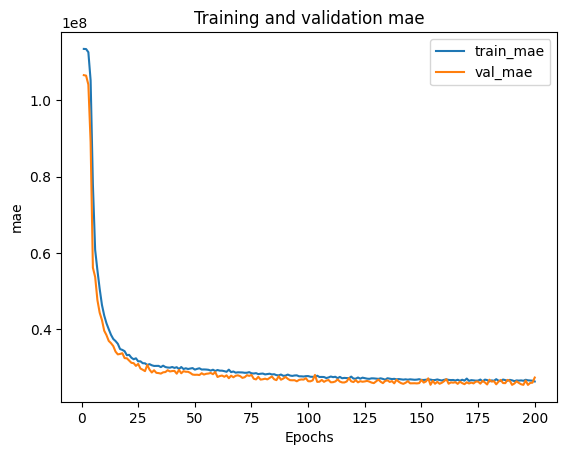

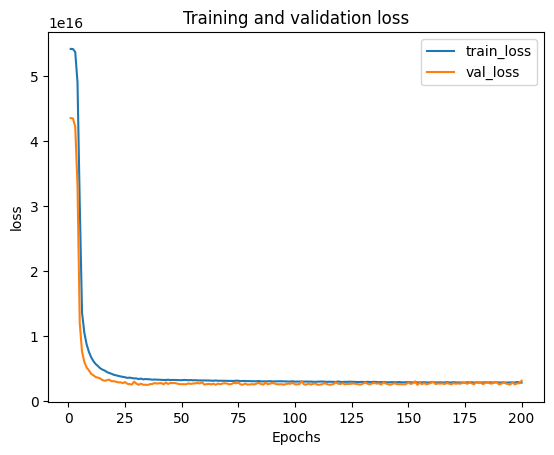

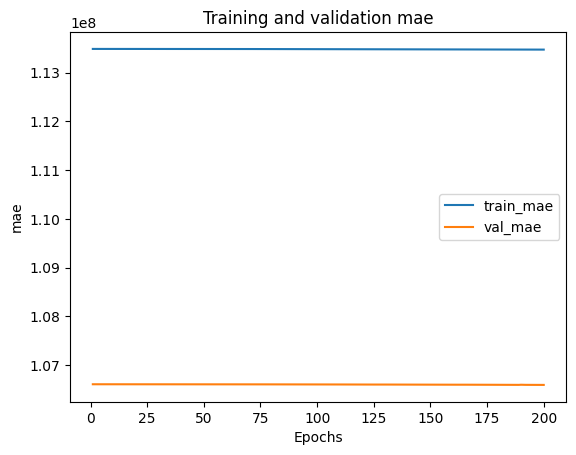

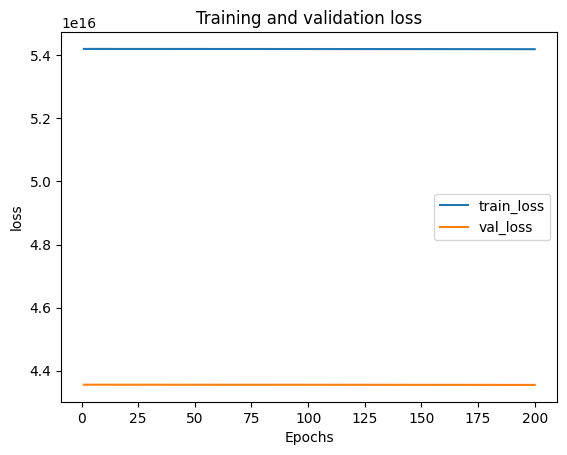

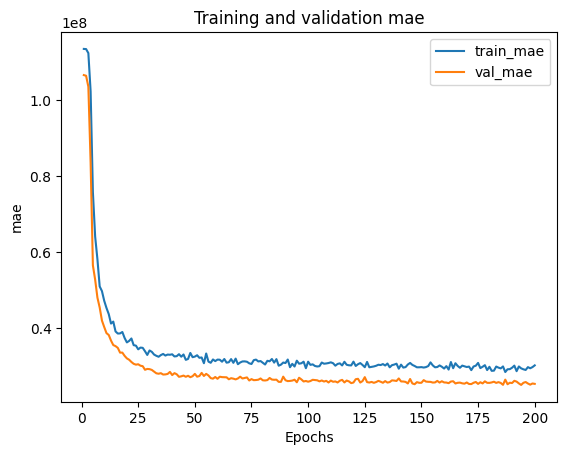

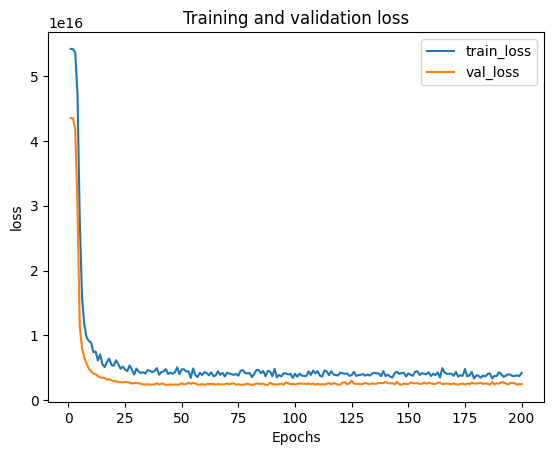

28/28 - 0s - 5ms/step - loss: 4205293747568640.0000 - mae: 31536302.0000
28/28 - 0s - 8ms/step - loss: 61190824267874304.0000 - mae: 127514912.0000
28/28 - 0s - 6ms/step - loss: 4053030714474496.0000 - mae: 30289868.0000
Model Unbatched - MAE: 31536302.0
Model Batched - MAE: 127514912.0
Model Dropout - MAE: 30289868.0


In [33]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_" + metric, 'val_' + metric])
    plt.show()

# Plot
plot_metric(unbatched_history, 'mae')
plot_metric(unbatched_history, 'loss')

plot_metric(batched_history, 'mae')
plot_metric(batched_history, 'loss')

plot_metric(dropout_history, 'mae')
plot_metric(dropout_history, 'loss')

mae_unbatched = unbatched_model.evaluate(X_test, y_test, verbose=2)
mae_batched = batched_model.evaluate(X_test, y_test, verbose=2)
mae_dropout = dropout_model.evaluate(X_test, y_test, verbose=2)

print(f"Model Unbatched - MAE: {mae_unbatched[1]}")
print(f"Model Batched - MAE: {mae_batched[1]}")
print(f"Model Dropout - MAE: {mae_dropout[1]}")
